<a href="https://colab.research.google.com/github/kamalnadhkundla/ML-BASICS/blob/main/04_Multiple_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
df=pd.read_csv("/content/economic_index.csv")
df.head()

,Unnamed: 0,year,month,interest_rate,unemployment_rate,index_price
0,0,2017,12,2.75,5.3,1464
1,1,2017,11,2.50,5.3,1394
2,2,2017,10,2.50,5.3,1357
3,3,2017,9,2.50,5.3,1293
4,4,2017,8,2.50,5.4,1256


In [3]:
import numpy as np
import matplotlib.pyplot as plt


In [4]:
#drop unnneccessary columns
df.drop(columns=["Unnamed: 0",'year','month'],axis=1,inplace=True)

In [5]:
df

,interest_rate,unemployment_rate,index_price
0,2.75,5.3,1464
1,2.50,5.3,1394
2,2.50,5.3,1357
3,2.50,5.3,1293
4,2.50,5.4,1256
5,2.50,5.6,1254
6,2.50,5.5,1234
7,2.25,5.5,1195
8,2.25,5.5,1159
9,2.25,5.6,1167


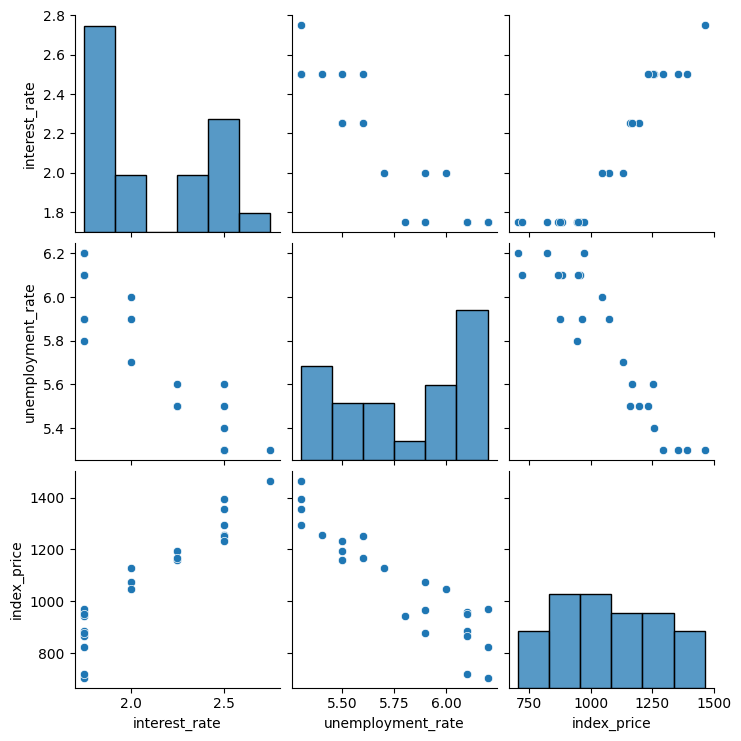

In [6]:
import seaborn as sns
sns.pairplot(df) #correaltion of feures

In [7]:
df.corr()

,interest_rate,unemployment_rate,index_price
interest_rate,1.000000,-0.925814,0.935793
unemployment_rate,-0.925814,1.000000,-0.922338
index_price,0.935793,-0.922338,1.000000


Text(0, 0.5, 'Unemployment rate')

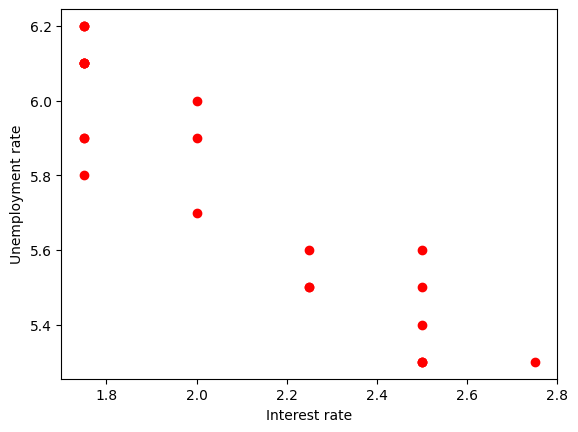

In [10]:
#visualize the data point more clear -> shows inverse relationship
plt.scatter(df['interest_rate'],df['unemployment_rate'],color='r')
plt.xlabel("Interest rate")
plt.ylabel("Unemployment rate")

In [12]:
X=df.iloc[:, :-1]
y=df.iloc[:,-1]

In [13]:
X.head()

,interest_rate,unemployment_rate
0,2.75,5.3
1,2.50,5.3
2,2.50,5.3
3,2.50,5.3
4,2.50,5.4


In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

<Axes: xlabel='interest_rate', ylabel='index_price'>

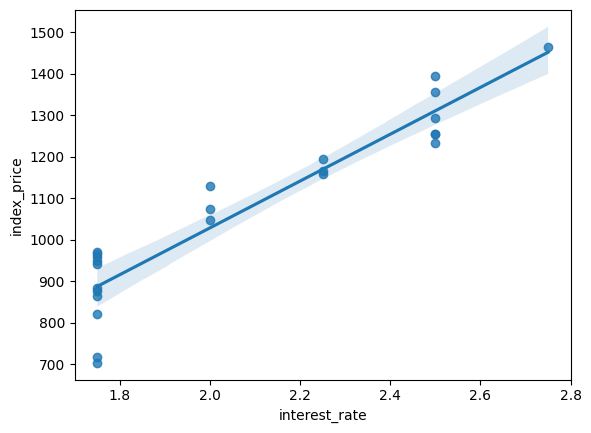

In [17]:
sns.regplot(data=df, x='interest_rate', y='index_price')

In [18]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [19]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [20]:
#cross validation
from sklearn.model_selection import cross_val_score
scores=cross_val_score(model,X_train,y_train,scoring='neg_mean_squared_error',cv=5)

In [21]:
np.mean(scores)

np.float64(-5649.115244350758)

In [22]:
y_pred=model.predict(X_test)

In [23]:
y_pred

array([1204.22770398,  821.65051903, 1406.51300368,  857.70889608,
        994.90992298, 1168.16932693])